## topic별 seq 길이 확인하기 

In [121]:
import os 
import numpy as np 
import pandas as pd

from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline


In [2]:
directory = os.getenv('HOME') + '/aiffel/aiffelthon/'

In [3]:
df = pd.read_csv(directory + 'meta_eng_raw_0306_v1.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [88]:
df_copy = df.copy()

In [5]:
df.head()

,text,dial,eng,title,creator,distributor,year,category,annotation_level,sampling,...,sex,prin_res,curr_res,age2,sex2,prin_res2,curr_res2,stdn,eojeol_stdn,reg
0,생각이 쪼금씩 바뀌더라고,생각이 쪼금씩 바뀌드라고,I've changed my mind a little bit.,DJSX20003625,솔트룩스,솔트룩스,2020.0,전라방언 > 사적 대화 > 일상 대화,['원시'],본문 전체,...,남성,광주,광주,40대,남성,광주,전남,생각이 쪼금씩 바뀌더라고,[['(바뀌드라고)/(바뀌더라고)']],jd
1,어 알겠는가 외국인들이 그래도 잘 적응하고,어 알겄는가 외국인들이 그래도 잘 적응하고,You know what? Foreigners still get used to it.,DJSX20004230,솔트룩스,솔트룩스,2020.0,전라방언 > 사적대화 > 일상대화,['원시'],본문 전체,...,여성,전남,광주,50대,여성,광주,광주,어 알겠는가 외국인들이 그래도 잘 적응하고,[['(알겄는가)/(알겠는가)']],jd
2,아으 갑자기 예전에 맹장 뜯은 게 생각난다.,아으 갑자기 예전에 맹장 뜯은 게 생각난디야.,"All of a sudden, I think I've ripped off my ap...",전라방언 AI 학습데이터 DJDG20001138,솔트룩스,솔트룩스,2020.0,전라방언 > 사적 대화 > 일상 대화,['원시'],본문 전체,...,여성,광주,전북,20대,여성,전북,전북,아으 갑자기 예전에 맹장 뜯은 게 생각난다.,[['(생각난디야.)/(생각난다.)']],jd
3,보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,I have a lot of ideas about getting older in a...,전라방언 AI 학습데이터 DJDG20001095,솔트룩스,솔트룩스,2020.0,전라방언 > 사적 대화 > 일상 대화,['원시'],본문 전체,...,여성,전북,전북,50대,여성,전북,경기,보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,[['(쫌)/(조금)']],jd
4,약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도,약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도,"It's a little bit of a tastey, but still...",전라방언 AI 학습데이터 DJDG20001507,솔트룩스,솔트룩스,2020.0,전라방언 > 사적 대화 > 일상 대화,['원시'],본문 전체,...,남성,전북,전북,20대,남성,전북,전북,약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도,[['(쫌)/(조금)']],jd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949888 entries, 0 to 949887
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   text              949888 non-null  object
 1   dial              949888 non-null  object
 2   eng               949888 non-null  object
 3   title             949888 non-null  object
 4   creator           949888 non-null  object
 5   distributor       949706 non-null  object
 6   year              949888 non-null  object
 7   category          949706 non-null  object
 8   annotation_level  949888 non-null  object
 9   sampling          949417 non-null  object
 10  author            925576 non-null  object
 11  publisher         925576 non-null  object
 12  date              949888 non-null  object
 13  topic             949888 non-null  object
 14  age               949888 non-null  object
 15  sex               949888 non-null  object
 16  prin_res          949888 non-null  obj

In [7]:
df[['text','dial','eng','topic']]

,text,dial,eng,topic
0,생각이 쪼금씩 바뀌더라고,생각이 쪼금씩 바뀌드라고,I've changed my mind a little bit.,역사
1,어 알겠는가 외국인들이 그래도 잘 적응하고,어 알겄는가 외국인들이 그래도 잘 적응하고,You know what? Foreigners still get used to it.,가족
2,아으 갑자기 예전에 맹장 뜯은 게 생각난다.,아으 갑자기 예전에 맹장 뜯은 게 생각난디야.,"All of a sudden, I think I've ripped off my ap...",건강
3,보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,I have a lot of ideas about getting older in a...,스타일
4,약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도,약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도,"It's a little bit of a tastey, but still...",먹거리
...,...,...,...,...
949883,뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...,뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...,I suppose I dont just go out to the nearest pl...,다이어트
949884,너는 만약에 그런 시대가 오면 네가 어떻게 활동할 것 같애?,너는 만약에 그런 시대가 오면 니가 어떻게 활동할 것 같애?,How do you think you will be active when that ...,4차산업혁명
949885,하이브도 있고 #조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는데,하이브도 있고 조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는디,There is a hive a webtoon called the area of J...,만화
949886,추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이니까 할 말도 많고 이~,추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이난이 할 말도 많고 이~,On Chuseok relatives and cousins only gathered...,반려동물


### column별 seq 평균 길이 

In [25]:
text_len_avg = int(df["text"].str.len().mean())
text_len_avg

26

In [26]:
dial_len_avg= int(df["dial"].str.len().mean())
dial_len_avg

26

In [27]:
eng_len_avg = int(df["eng"].str.len().mean())
eng_len_avg

56

In [61]:
df.text.apply(lambda x: len(str(x)) < 25).sum()

490034

In [60]:
df.text.apply(lambda x: len(str(x)) < 50).sum()

885383

In [64]:
df.text.apply(lambda x: 50 <= len(str(x)) < 75).sum()

60916

In [65]:
df.text.apply(lambda x: 75 <= len(str(x)) < 100).sum()

3356

In [59]:
df.text.apply(lambda x: 100 <= len(str(x))).sum()

233

In [66]:
df.topic.value_counts()

가족            156058
연애/결혼          83728
먹거리            65261
회사/학교          64880
여행지(국내/해외)     45034
건강             41746
드라마            41174
성격             28034
취미             27904
영화             22700
방송/연예          22438
꿈(목표)          21704
아르바이트          21414
반려동물           19789
계절             18619
쇼핑             18558
음악             17865
다이어트           15617
스타일            14218
스포츠/레저         13856
경제             13291
공연             12397
선물             12248
문학             11883
날씨             11881
군대             11792
좌우명            11636
재테크            11561
게임             10945
역사             10869
종교             10727
전자기기           10540
자동차/오토바이       10045
자격증             8476
콤플렉스            8277
만화              7044
SNS             6160
정치              3743
4차산업혁명          3211
법률              2565
Name: topic, dtype: int64

In [103]:
df_top_1 = df[df['topic'].str.contains('가족')]
df_top_2 = df[df['topic'].str.contains('연애/결혼')]
df_top_3 = df[df['topic'].str.contains('먹거리')]
df_top_4 = df[df['topic'].str.contains('회사/학교')]
df_top_5 = df[df['topic'].str.contains('여행지')]

In [127]:
df_top_1_ls = list(df_top_1['text'])
df_top_1_ls

['어 알겠는가 외국인들이 그래도 잘 적응하고',
 '뭐 그걸로 애초에 내가 뭐 증명을 하려고 했었는데',
 '그렇죠?',
 '머리 쪽에 엠알아이를 찍어 보래요.',
 '한번 그냥 속는 셈 치고 가보세 그러더라고.',
 '그래서 인제 큰일 났다',
 '응~ 하라는 공부는 안 하고 맨날 술 처먹고 돌아다니다가 응~ 자기는 자기 나름대로 공부를 한다고 하는데 내가 뭐~ 우기는 그게 아닌 거 같거든.',
 '그리고 막둥이는',
 '터지기 직전의 것도 이제 이거 이렇게 뭘 빼 갖고 이제',
 '같이 가서 나는 일층 로비에 기다리고',
 '나는 애낳고 몸 풀러 몸 만드려고 약 지으러 갔는데',
 '가족들이 더 많이 생기고 그러면은',
 '그래서 그냥 이제 그 상태에서는 우리가 선택을 하면 산소호흡기를 꽂아서 놓을 수 있는데',
 '그~ 흔히 막 중이병이라고 하지 그래 가지구 막 자기가 뭐~ 완전 센 거 같고 막 자기가 막 최고인 거 같고 막 그래 가지고',
 '그러니까 요거를 계속 한 거지 요거 요거 요거 CPR 라 근가',
 '하나는 핏줄이 머리를 향한 핏줄이 좁아졌고',
 '거기서 찍어보라니까 인제 난 무섭지',
 '그리고 우리 오빠는 지금 공부를 하는 중인데 이 시키가',
 '별로 부를 기회도 없고 애들이',
 '그날 염색을 하고 아이구 어머니한테 이쁘게 가야되겠다 이런 생각이 들었다고?',
 '솔직히 과락 뜬 과목 열심히 했으면 그 정도는 붙어야 되는 거 아니냐고 근데 또 자기는 또',
 '보면서 하고 있으면 그 다음날 아침에 일어나는 게 너무 편한데',
 '메니에르 혹시 메니에르라고 알아?',
 '근데 나는 한 없이 남겨 갖고 엄마를 이렇게 챙겨주 챙겨 줬대.',
 '여자 친구를 사귈 수 있지 않을까라고 생각핸 하는데',
 '그래서 이제 입원해 가지고 엠알아이 찍고 나왔는데 아무 이상이 없데요.',
 '우리 애들도 결혼하면 이제',
 '주머니에 넣어 주거나 손에 이렇게 갖다주거든',
 '식구들이 이제 아버님 볼 때까지만 어떻게 오실 때까지만 이렇게',
 '원만

In [128]:
df_top_2_ls = list(df_top_2['text'])
df_top_3_ls = list(df_top_3['text'])
df_top_4_ls = list(df_top_4['text'])
df_top_5_ls = list(df_top_5['text'])

In [130]:
df_top_1_len = [len(t) for t in df_top_1_ls]
df_top_1_len

[23,
 27,
 4,
 19,
 24,
 12,
 81,
 8,
 30,
 20,
 28,
 18,
 48,
 69,
 34,
 23,
 19,
 30,
 16,
 42,
 50,
 34,
 18,
 35,
 28,
 39,
 14,
 24,
 34,
 19,
 25,
 30,
 35,
 8,
 38,
 43,
 24,
 41,
 25,
 23,
 30,
 21,
 21,
 41,
 24,
 22,
 34,
 62,
 21,
 14,
 7,
 53,
 70,
 22,
 22,
 9,
 36,
 10,
 25,
 22,
 16,
 34,
 26,
 13,
 36,
 30,
 54,
 7,
 21,
 34,
 3,
 13,
 33,
 42,
 25,
 15,
 27,
 36,
 55,
 5,
 36,
 34,
 13,
 8,
 26,
 25,
 49,
 17,
 3,
 24,
 50,
 18,
 38,
 15,
 44,
 30,
 38,
 46,
 12,
 21,
 30,
 22,
 38,
 26,
 3,
 13,
 36,
 65,
 70,
 19,
 23,
 21,
 61,
 30,
 16,
 21,
 26,
 29,
 38,
 22,
 17,
 50,
 30,
 22,
 38,
 41,
 40,
 22,
 14,
 32,
 54,
 16,
 14,
 25,
 17,
 31,
 67,
 20,
 18,
 37,
 40,
 13,
 3,
 40,
 29,
 39,
 30,
 25,
 31,
 38,
 29,
 22,
 24,
 45,
 50,
 35,
 44,
 24,
 27,
 26,
 26,
 22,
 27,
 86,
 13,
 44,
 22,
 23,
 21,
 34,
 37,
 23,
 21,
 39,
 36,
 7,
 42,
 18,
 34,
 49,
 21,
 12,
 3,
 43,
 35,
 18,
 17,
 66,
 36,
 47,
 21,
 10,
 34,
 41,
 20,
 12,
 10,
 30,
 20,
 29,
 26,
 54,
 15,

In [131]:
df_top_2_len = [len(t) for t in df_top_2_ls]
df_top_3_len = [len(t) for t in df_top_3_ls]
df_top_4_len = [len(t) for t in df_top_4_ls]
df_top_5_len = [len(t) for t in df_top_5_ls]

In [123]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, 'Counts')

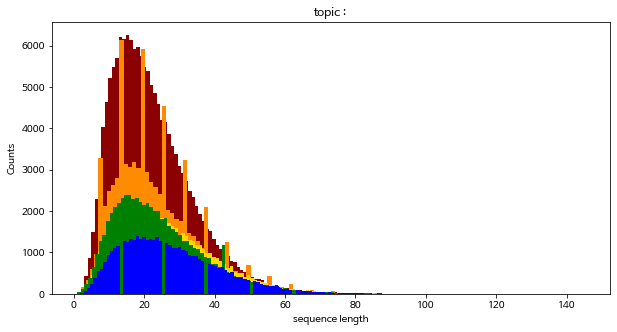

In [170]:
plt.figure(figsize = (10,5))

#가족
plt.hist(df_top_1_len, bins = 120, alpha=1, color="darkred", label="word") 

#연애/결혼
plt.hist(df_top_2_len, bins = 120, alpha=1, color="darkorange", label="word")

#먹거리
plt.hist(df_top_3_len, bins = 120, alpha=1, color="gold", label="word")

#회사/결혼
plt.hist(df_top_4_len, bins = 120, alpha=1, color="g", label="word")

#여행지
plt.hist(df_top_5_len, bins = 120, alpha=1, color="b", label="word")

# topic별로 이름 바꾸기 
plt.title('topic : ')
plt.xlabel('sequence length')
plt.ylabel('Counts')

## [ref]
- https://inistory.tistory.com/93
- https://soyoung-new-challenge.tistory.com/35
- color 참고 
    - https://matplotlib.org/3.1.0/gallery/color/named_colors.html